# ML Workflow

#### Data Collection
#### Data Preparation
#### Algorithm (Model) Selection
#### Model Training
#### Model Evaluation
#### Model Tuning
#### Model Deplyment
#### Prediction

# Pandas

> `pandas` is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

> `pandas` is well suited for many different kinds of data:

> * Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
* Ordered and unordered (not necessarily fixed-frequency) time series data.
* Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
* Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

For more tutorials, visit: https://pandas.pydata.org/pandas-docs/stable/tutorials.html

And here is a nice cheatsheet: https://elitedatascience.com/python-cheat-sheet

### Imports

Here we import Pandas and Matplotlib for data visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Read data

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

We load the data in using Pandas and create a Dataframe called `titanic`.

In [2]:
# local
titanic = pd.read_csv('data/titanic.csv')

### Help

Jupyter provides a **magic** command to look at the documentation of a function by adding a question mark.

In [3]:
pd.read_csv?

### Get first n rows

In [4]:
titanic.head(7)

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"


### Dataframe dimensions

Get the number of rows and columns. `(rows, columns)`

In [5]:
titanic.shape

(1308, 14)

### Index

The index is set to [0, 1, 2...nrows] by default if you don't specify it.

In [6]:
titanic.index

RangeIndex(start=0, stop=1308, step=1)

Let's consult pd to learn more about indices.

In [7]:
titanic.set_index?

In [8]:
titanic.reset_index?

### Columns

In [9]:
titanic.columns

Index(['pclass', 'survived', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

### Dataframe information

Show some general information about your dataframe like the column names, the type, the number of non-missing values as well as the memory usage. Pandas Dataframes are loaded entirely into memory.

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 14 columns):
pclass       1308 non-null int64
survived     1308 non-null int64
name         1308 non-null object
gender       1308 non-null object
age          1045 non-null float64
sibsp        1308 non-null int64
parch        1308 non-null int64
ticket       1308 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1306 non-null object
boat         486 non-null object
body         120 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.1+ KB


### Values

In [11]:
titanic.values

array([[1, 1, 'Allen, Miss. Elisabeth Walton', ..., '2', nan,
        'St Louis, MO'],
       [1, 1, 'Allison, Master. Hudson Trevor', ..., '11', nan,
        'Montreal, PQ / Chesterville, ON'],
       [1, 0, 'Allison, Miss. Helen Loraine', ..., nan, nan,
        'Montreal, PQ / Chesterville, ON'],
       ...,
       [3, 0, 'Zakarian, Mr. Mapriededer', ..., nan, 304.0, nan],
       [3, 0, 'Zakarian, Mr. Ortin', ..., nan, nan, nan],
       [3, 0, 'Zimmerman, Mr. Leo', ..., nan, nan, nan]], dtype=object)

### Summary statistics for numeric columns

By default `describe` will include only numeric columns. By setting `include='all'` it also shows all types.

In [12]:
titanic.describe(include='all')

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1308.000000,1308.000000,1308,1308,1045.000000,1308.000000,1308.000000,1308,1308.000000,295,1306,486,120.000000,745
unique,NaN,NaN,1306,2,NaN,NaN,NaN,928,NaN,186,3,27,NaN,369
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,842,NaN,NaN,NaN,11,NaN,6,913,39,NaN,64
mean,2.294343,0.382263,NaN,NaN,29.851834,0.499235,0.385321,NaN,33.295479,NaN,NaN,NaN,159.975000,NaN
std,0.837929,0.486126,NaN,NaN,14.389201,1.041965,0.865826,NaN,51.758668,NaN,NaN,NaN,97.672103,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,71.500000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,154.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,255.250000,NaN


# $\Omega$ Selecting Data

### Select column

In [13]:
titanic['name']

0                           Allen, Miss. Elisabeth Walton
1                          Allison, Master. Hudson Trevor
2                            Allison, Miss. Helen Loraine
3                    Allison, Mr. Hudson Joshua Creighton
4         Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
5                                     Anderson, Mr. Harry
6                       Andrews, Miss. Kornelia Theodosia
7                                  Andrews, Mr. Thomas Jr
8           Appleton, Mrs. Edward Dale (Charlotte Lamson)
9                                 Artagaveytia, Mr. Ramon
10                                 Astor, Col. John Jacob
11      Astor, Mrs. John Jacob (Madeleine Talmadge Force)
12                          Aubart, Mme. Leontine Pauline
13                           Barber, Miss. Ellen "Nellie"
14                   Barkworth, Mr. Algernon Henry Wilson
15                                    Baumann, Mr. John D
16                               Baxter, Mr. Quigg Edmond
17        Baxt

### Select multiple columns

In [14]:
titanic[['name', 'fare']]

,name,fare
0,"Allen, Miss. Elisabeth Walton",211.3375
1,"Allison, Master. Hudson Trevor",151.5500
2,"Allison, Miss. Helen Loraine",151.5500
3,"Allison, Mr. Hudson Joshua Creighton",151.5500
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",151.5500
5,"Anderson, Mr. Harry",26.5500
6,"Andrews, Miss. Kornelia Theodosia",77.9583
7,"Andrews, Mr. Thomas Jr",0.0000
8,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",51.4792
9,"Artagaveytia, Mr. Ramon",49.5042


### Select rows and columns by name

Use `loc` to slice your data. The first parameter is the names of the indices (this can be a range) and the second is a column or a list of columns.

In [15]:
titanic.loc[10:20, ['name', 'fare']]

,name,fare
10,"Astor, Col. John Jacob",227.5250
11,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",227.5250
12,"Aubart, Mme. Leontine Pauline",69.3000
13,"Barber, Miss. Ellen ""Nellie""",78.8500
14,"Barkworth, Mr. Algernon Henry Wilson",30.0000
15,"Baumann, Mr. John D",25.9250
16,"Baxter, Mr. Quigg Edmond",247.5208
17,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",247.5208
18,"Bazzani, Miss. Albina",76.2917
19,"Beattie, Mr. Thomson",75.2417


### Select rows and columns by range of indices

The difference with `iloc` is instead of using the **names** of the indices or columns, it uses the **integer positions**. For example instead selecting the 'age' column, we can select the column in position 4.

In [16]:
titanic.iloc[10:20, 0:3]

,pclass,survived,name
10,1,0,"Astor, Col. John Jacob"
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)"
12,1,1,"Aubart, Mme. Leontine Pauline"
13,1,1,"Barber, Miss. Ellen ""Nellie"""
14,1,1,"Barkworth, Mr. Algernon Henry Wilson"
15,1,0,"Baumann, Mr. John D"
16,1,0,"Baxter, Mr. Quigg Edmond"
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)"
18,1,1,"Bazzani, Miss. Albina"
19,1,0,"Beattie, Mr. Thomson"


### Select rows based on condition (filter)

In [17]:
titanic[titanic['fare'] > 100]

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
10,1,0,"Astor, Col. John Jacob",male,47.0000,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY"
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0000,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY"
16,1,0,"Baxter, Mr. Quigg Edmond",male,24.0000,0,1,PC 17558,247.5208,B58 B60,C,NaN,NaN,"Montreal, PQ"
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0000,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ"
23,1,1,"Bidois, Miss. Rosalie",female,42.0000,0,0,PC 17757,227.5250,NaN,C,4,NaN,NaN


## $\Delta$ Exercise 1 - Toronto Subway Delay Data

https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#917dd033-1fe5-4ba8-04ca-f683eec89761

**Deliverables:**
1. Read the data `subway.csv` and set it to the variable `subway`
2. Show the last 10 rows (hint: use `tail`)
3. Show the summary statistics
4. Select columns "Date" and "Time" for rows 100 to 200

In [18]:
########################
# Your Code Below
########################

# $\Omega$ Transforming Data

### Calculate ticket price in today's dollar
According to the Bureau of Labor Statistics consumer price index, prices in 2018 are 2,669.00% higher than prices in 1909. The dollar experienced an average inflation rate of 3.09% per year.

In [19]:
titanic['fare'] * 26.69

0       5640.597875
1       4044.869500
2       4044.869500
3       4044.869500
4       4044.869500
5        708.619500
6       2080.707027
7          0.000000
8       1373.979848
9       1321.267098
10      6072.642250
11      6072.642250
12      1849.617000
13      2104.506500
14       800.700000
15       691.938250
16      6606.330152
17      6606.330152
18      2036.225473
19      2008.200973
20      1402.671598
21      1402.671598
22       800.700000
23      6072.642250
24      5919.286848
25       693.940000
26      2430.903848
27      2430.903848
28      3620.052777
29       708.619500
           ...     
1278     209.628598
1279     210.738902
1280     240.210000
1281     214.854500
1282     201.509500
1283     214.854500
1284     253.555000
1285     192.947348
1286     206.847500
1287     173.372902
1288     173.372902
1289     186.830000
1290     232.536625
1291     201.509500
1292     214.854500
1293     429.709000
1294     193.502500
1295     231.202125
1296     193.502500


In [20]:
(titanic['fare'] * 26.69).round(2)

0       5640.60
1       4044.87
2       4044.87
3       4044.87
4       4044.87
5        708.62
6       2080.71
7          0.00
8       1373.98
9       1321.27
10      6072.64
11      6072.64
12      1849.62
13      2104.51
14       800.70
15       691.94
16      6606.33
17      6606.33
18      2036.23
19      2008.20
20      1402.67
21      1402.67
22       800.70
23      6072.64
24      5919.29
25       693.94
26      2430.90
27      2430.90
28      3620.05
29       708.62
         ...   
1278     209.63
1279     210.74
1280     240.21
1281     214.85
1282     201.51
1283     214.85
1284     253.56
1285     192.95
1286     206.85
1287     173.37
1288     173.37
1289     186.83
1290     232.54
1291     201.51
1292     214.85
1293     429.71
1294     193.50
1295     231.20
1296     193.50
1297     253.56
1298     385.78
1299     385.78
1300     192.84
1301     192.84
1302     385.89
1303     385.78
1304     385.78
1305     192.84
1306     192.84
1307     210.18
Name: fare, Length: 1308

### Add new column

In [21]:
titanic['fare_2018'] = (titanic['fare'] * 26.69).round(2)

### Count missing values

In [22]:
titanic.isnull().sum()

pclass          0
survived        0
name            0
gender          0
age           263
sibsp           0
parch           0
ticket          0
fare            0
cabin        1013
embarked        2
boat          822
body         1188
home.dest     563
fare_2018       0
dtype: int64

### Calculate mean

In [23]:
titanic['age'].mean()

29.851834162679427

In [24]:
mean_age = titanic['age'].mean()

### Fill missing values

In [25]:
titanic['age'] = titanic['age'].fillna(mean_age).round(0).astype(int)

### Count categorical data

In [26]:
titanic['gender'].value_counts()

male      842
female    466
Name: gender, dtype: int64

### Groupby & aggregate

In [27]:
titanic.groupby('gender')['survived'].sum()

gender
female    339
male      161
Name: survived, dtype: int64

In [28]:
titanic['is_child'] = titanic['age'] < 18

In [29]:
titanic.groupby('is_child')['survived'].sum()

is_child
False    419
True      81
Name: survived, dtype: int64

### Save new dataframe as csv

In [30]:
# titanic.to_csv('data/new_titanic.csv')

## $\Delta$ Exercise 2 - Subway Dataset

Some helpful functions:
- `pd.to_datetime`
- `.dt.year`
- `.dt.month`
- `.dt.dayofweek`
- `.dt.hour`

**Deliverables:**
1. Convert `Date` to a datetime object and replace the old one
2. Create a new column called `year`
3. Create a new column called `month`
4. Create a new column called `dayofweek`
5. Create a new column called `label` with value `0` if the `Min Delay` is less than 5 and `1` if it's greater than or equal to 5
6. Print the type of every column
7. Print new summary statistics

In [31]:
########################
# Your Code Below
########################

# $\Omega$ Data Visualization
https://pandas.pydata.org/pandas-docs/stable/visualization.html

### Bar plot

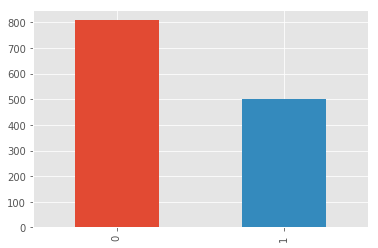

In [74]:
titanic['survived'].value_counts().plot(kind='bar')

### Pie plot

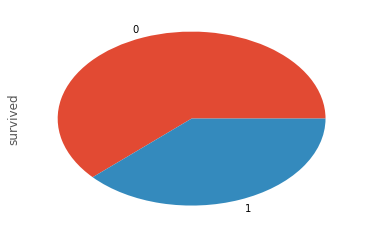

In [75]:
titanic['survived'].value_counts().plot(kind='pie')

### Set figure size

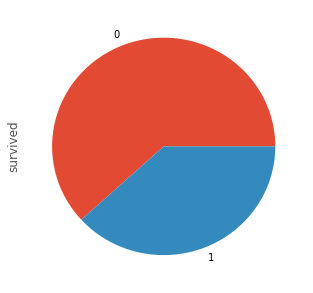

In [76]:
titanic['survived'].value_counts().plot(kind='pie', figsize=(5, 5))

### Set plot style

In [77]:
plt.style.use('ggplot')

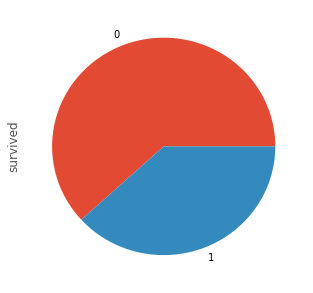

In [78]:
titanic['survived'].value_counts().plot(kind='pie', figsize=(5, 5))

### Histogram

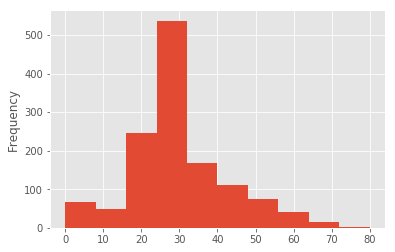

In [79]:
titanic['age'].plot(kind='hist')

### Set histogram bin size

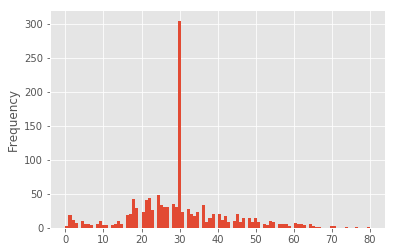

In [80]:
titanic['age'].plot(kind='hist', bins=100)

### Boxplot

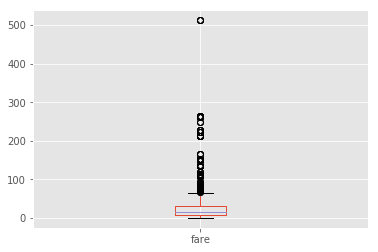

In [81]:
titanic['fare'].plot(kind='box')

### Scatter plot

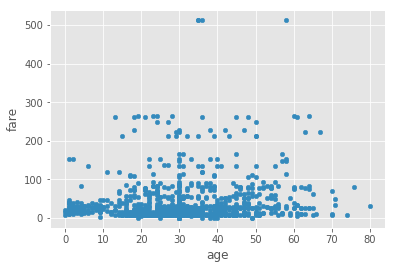

In [82]:
titanic[['fare', 'age']].plot(x='age', y='fare', kind='scatter')

### Transform then plot

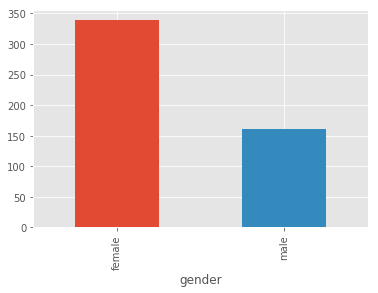

In [83]:
titanic.groupby('gender')['survived'].sum().plot(kind='bar')

## $\Delta$ Exercise 3 - Subway Dataset

**Deliverables:**
1. Create a bar plot of `label`
2. Create a histogram of `Min Delay`
3. Create a boxplot of `Min Delay`
4. Plot the 10 most frequent `Codes`
5. Plot the 10 `Codes` that have the most delays over 5 minutes

**Bonus:**
- Explore the dataset and see if you can come up with your own interesting analysis or plots

In [42]:
########################
# Your Code Below
########################

# $\Omega$ Machine Learning

http://scikit-learn.org/stable/user_guide.html

https://docs.google.com/presentation/d/1HDCbQ7-Abh3wi0L4Dg4i8V1orovsatKX_LgeQ85t_HY/edit#slide=id.p

- `pip install scikit-plot`
- `pip install mlxtend`

In [43]:
!pip install scikit-plot
!pip install mlxtend

In [84]:
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from mlxtend.plotting import category_scatter
from mlxtend.plotting import plot_decision_regions

import scikitplot as skplt

In [86]:
X, y = make_blobs(centers=[[1, 1], [5, 4]], random_state=1)

df = pd.DataFrame(X, columns=['feature1', 'feature2']).assign(label=y)

df.head()

,feature1,feature2,label
0,0.471828,-0.072969,0
1,4.889553,3.382638,1
2,5.520576,2.855659,1
3,4.819080,3.396079,1
4,7.190700,2.103639,1


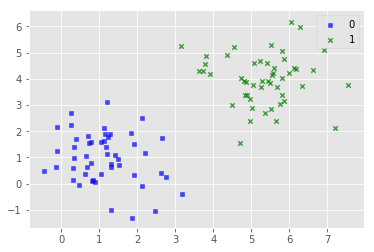

In [87]:
category_scatter(x='feature1', y='feature2', label_col='label', data=df);

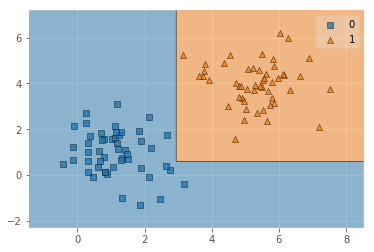

In [89]:
d_tree = DecisionTreeClassifier(max_depth=3)
d_tree.fit(X, y)

plot_decision_regions(X, y, clf=d_tree);

### Titanic 

In [90]:
titanic.head()

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,fare_2018,is_child
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",5640.60,False
1,1,1,"Allison, Master. Hudson Trevor",male,1,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",4044.87,True
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4044.87,True
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",4044.87,False
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4044.87,False


### Selecting features

In [49]:
features = ['gender', 'fare', 'age', 'is_child']

titanic[features]

,gender,fare,age,is_child
0,female,211.3375,29,False
1,male,151.5500,1,True
2,female,151.5500,2,True
3,male,151.5500,30,False
4,female,151.5500,25,False
5,male,26.5500,48,False
6,female,77.9583,63,False
7,male,0.0000,39,False
8,female,51.4792,53,False
9,male,49.5042,71,False


### One hot encoding

In [50]:
titanic['gender'].head(20)

0     female
1       male
2     female
3       male
4     female
5       male
6     female
7       male
8     female
9       male
10      male
11    female
12    female
13    female
14      male
15      male
16      male
17    female
18    female
19      male
Name: gender, dtype: object

In [51]:
pd.get_dummies(titanic['gender'])

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,0,1
6,1,0
7,0,1
8,1,0
9,0,1


### Make feature dataset

In [96]:
X = pd.get_dummies(titanic[features], drop_first=True)
X.head()

,fare,age,is_child,gender_male
0,211.3375,29,False,0
1,151.5500,1,True,1
2,151.5500,2,True,0
3,151.5500,30,False,1
4,151.5500,25,False,0


### Make label

In [97]:
y = titanic['survived']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

### Make validation dataset

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_test.shape

(432, 4)

### Build/train model

In [107]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Model accuracy

In [108]:
model.score(X_test, y_test)

0.75

### Model prediction

In [109]:
y_pred = model.predict(X_test)

### Model evaluation

In [110]:
y_pred[:10]

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [111]:
y_test[:10]

1013    0
1048    1
695     0
736     0
723     0
240     1
1117    0
788     0
1173    0
65      1
Name: survived, dtype: int64

In [112]:
confusion_matrix(y_test, y_pred)

array([[209,  49],
       [ 59, 115]])

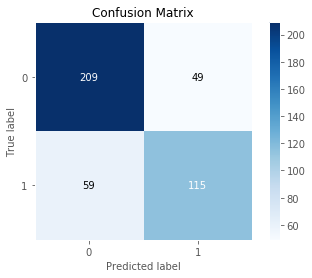

In [113]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [62]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.78      0.81      0.80       258
          1       0.70      0.66      0.68       174

avg / total       0.75      0.75      0.75       432



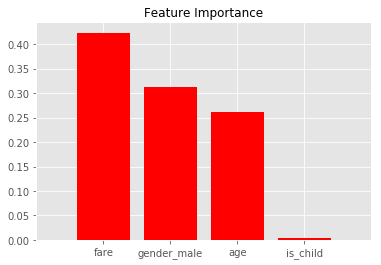

In [63]:
skplt.estimators.plot_feature_importances(model, feature_names=X.columns)

## $\Delta$ Exercise 4 - Subway Dataset

**Deliverables:**
1. Create a list of features: Day, Code, Station, Bound, Line, month, year
2. One hot encode the categorical features
3. Create the feature set called `X`
4. Create the target label `y` (delays over 5 minuties)
5. Train and evaluate a model
6. Randomly train 10 models and average their results

# More Productive ML

## Cross Validation

In [64]:
from sklearn.model_selection import cross_val_score
cv_model = RandomForestClassifier(n_estimators=25)
scores = cross_val_score(cv_model, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.73 (+/- 0.17)


### Scoring Functions

In [65]:
from sklearn import metrics
scores = cross_val_score(cv_model, X, y, cv=10, scoring='f1_macro')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.70 (+/- 0.18)


More information here:

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

https://scikit-learn.org/stable/modules/cross_validation.html

## Random Forest: an ensemble model

In [66]:
rf_model = RandomForestClassifier(n_estimators=25)
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.7662037037037037

In [67]:
y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.78      0.84      0.81       258
          1       0.74      0.65      0.69       174

avg / total       0.76      0.77      0.76       432



More on ensemble models:

https://scikit-learn.org/stable/modules/ensemble.html

### $\Delta$ Quick Test

How does adding n_estimators influence model.score()?

In [68]:
########################
# Your Code Below
########################

## Hyperparameter Tuning

In [114]:
from time import time
import numpy as np

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print()
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print()
            print("Parameters: {0}".format(results['params'][candidate]))
            print("------------------------------------------------------------")

In [115]:
X.head()

,fare,age,is_child,gender_male
0,211.3375,29,False,0
1,151.5500,1,True,1
2,151.5500,2,True,0
3,151.5500,30,False,1
4,151.5500,25,False,0


### Randomized Search

In [71]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
rs_model = RandomForestClassifier(n_estimators=25)

# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 5),
              "min_samples_split": sp_randint(2, 5),
              "min_samples_leaf": sp_randint(1, 5),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
rand_search = RandomizedSearchCV(rs_model, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
rand_search.fit(X, y)

print("RandSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(rand_search.cv_results_['params'])))
print("-----------------------------------------------------------------------------")
print()
report(rand_search.cv_results_)

RandSearchCV took 2.46 seconds for 20 candidate parameter settings.
-----------------------------------------------------------------------------

Model with rank: 1

Mean validation score: 0.752 (std: 0.094)

Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
------------------------------------------------------------
Model with rank: 2

Mean validation score: 0.750 (std: 0.097)

Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 2}
------------------------------------------------------------
Model with rank: 3

Mean validation score: 0.749 (std: 0.098)

Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
------------------------------------------------------------
Model with rank: 3

Mean validation score: 0.749 (std: 0.092)

Paramet

### Grid Search

In [72]:
from sklearn.model_selection import GridSearchCV
gs_model = RandomForestClassifier(n_estimators=25)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 4],
              "min_samples_split": [2, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(gs_model, param_grid=param_grid, cv=5)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
print("-----------------------------------------------------------------------------")
print()
report(grid_search.cv_results_)

GridSearchCV took 10.56 seconds for 48 candidate parameter settings.
-----------------------------------------------------------------------------

Model with rank: 1

Mean validation score: 0.752 (std: 0.092)

Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'min_samples_split': 2}
------------------------------------------------------------
Model with rank: 2

Mean validation score: 0.749 (std: 0.075)

Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'min_samples_split': 2}
------------------------------------------------------------
Model with rank: 3

Mean validation score: 0.747 (std: 0.071)

Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 1, 'min_samples_split': 2}
------------------------------------------------------------


## $\Delta$ Exercise 5 - Subway Dataset

**Deliverable:**
Create an ensemble model using grid search and try to beat your last decision tree

In [73]:
########################
# Your Code Below
########################